In [1]:
import pandas as pd

In [26]:

df = pd.read_csv('data/shopping_trends.csv')

In [27]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [28]:
numeric_features = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
categorical_features = ['Category', 'Color', 'Season', 'Frequency of Purchases']

In [29]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


In [30]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


In [31]:
def calculate_wcss(pipeline, X, max_clusters=10):
    wcss = []
    for i in range(1, max_clusters + 1):
        pipeline.set_params(kmeans__n_clusters=i)
        pipeline.fit(X)
        wcss.append(pipeline.named_steps['kmeans'].inertia_)
    return wcss

In [32]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

In [78]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(random_state=42))
])

In [79]:
X = df[numeric_features + categorical_features]

In [80]:
X

,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Category,Color,Season,Frequency of Purchases
0,55,53,3.1,14,Clothing,Gray,Winter,Fortnightly
1,19,64,3.1,2,Clothing,Maroon,Winter,Fortnightly
2,50,73,3.1,23,Clothing,Maroon,Spring,Weekly
3,21,90,3.5,49,Footwear,Maroon,Spring,Weekly
4,45,49,2.7,31,Clothing,Turquoise,Spring,Annually
...,...,...,...,...,...,...,...,...
3895,40,28,4.2,32,Clothing,Turquoise,Summer,Weekly
3896,52,49,4.5,41,Accessories,White,Spring,Bi-Weekly
3897,46,33,2.9,24,Accessories,Green,Spring,Quarterly
3898,44,77,3.8,24,Footwear,Brown,Summer,Weekly


In [81]:
wcss = calculate_wcss(pipeline, X)

In [82]:
import matplotlib.pyplot as plt

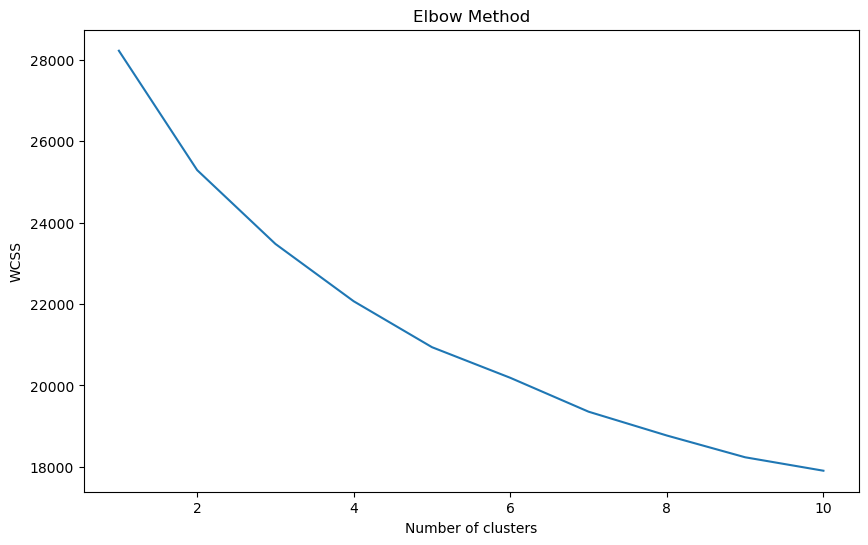

In [83]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(wcss) + 1), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [84]:
optimal_clusters = 5

In [85]:
pipeline.set_params(kmeans__n_clusters=optimal_clusters)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age',
                                                   'Purchase Amount (USD)',
                                                   'Review Rating',
                                                   'Previous Purchases']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Category', 'Color',
                                                   'Season',
                                                   'Frequency of '
                                                   'Purchases'])])),
                ('kmeans', KMeans(n_clusters=5, random_state=42))])

In [86]:
df['Cluster'] = pipeline.fit_predict(X)

In [42]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Cluster
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,4
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,1
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,4
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly,3
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly,6
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,6
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly,4
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly,3


In [44]:

df.to_csv('customer_data.csv')

In [87]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Cluster
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,4
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,1
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,1
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly,3
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly,2
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,0
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly,4
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly,0


In [88]:
X['Cluster'] = df['Cluster']

C:\Users\USER\AppData\Local\Temp\ipykernel_10536\403677439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = df['Cluster']


In [48]:
X

,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Category,Color,Season,Frequency of Purchases,Cluster
0,55,53,3.1,14,Clothing,Gray,Winter,Fortnightly,4
1,19,64,3.1,2,Clothing,Maroon,Winter,Fortnightly,1
2,50,73,3.1,23,Clothing,Maroon,Spring,Weekly,4
3,21,90,3.5,49,Footwear,Maroon,Spring,Weekly,3
4,45,49,2.7,31,Clothing,Turquoise,Spring,Annually,5
...,...,...,...,...,...,...,...,...,...
3895,40,28,4.2,32,Clothing,Turquoise,Summer,Weekly,6
3896,52,49,4.5,41,Accessories,White,Spring,Bi-Weekly,6
3897,46,33,2.9,24,Accessories,Green,Spring,Quarterly,4
3898,44,77,3.8,24,Footwear,Brown,Summer,Weekly,3


In [89]:
numeric_features2 = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
categorical_features2 = ['Category', 'Color', 'Season', 'Frequency of Purchases']

In [90]:
X2 = df[numeric_features2 + categorical_features2]

In [91]:
y2 = df['Cluster']

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [94]:
preprocessor2 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features2),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features2)
    ])

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [96]:
# 로지스틱 회귀 파이프라인
logistic_pipeline = Pipeline([
    ('preprocessor', preprocessor2),
    ('classifier', LogisticRegression(random_state=42))
])


In [97]:
# 랜덤 포레스트 파이프라인
random_forest_pipeline = Pipeline([
    ('preprocessor', preprocessor2),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [98]:
# XGBoost 파이프라인
xgboost_pipeline = Pipeline([
    ('preprocessor', preprocessor2),
    ('classifier', XGBClassifier(random_state=42))
])


In [99]:
logistic_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age',
                                                   'Purchase Amount (USD)',
                                                   'Review Rating',
                                                   'Previous Purchases']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Category', 'Color',
                                                   'Season',
                                                   'Frequency of '
                                                   'Purchases'])])),
                ('classifier', LogisticRegression(random_state=42))])

In [100]:
random_forest_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age',
                                                   'Purchase Amount (USD)',
                                                   'Review Rating',
                                                   'Previous Purchases']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Category', 'Color',
                                                   'Season',
                                                   'Frequency of '
                                                   'Purchases'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [101]:
xgboost_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age',
                                                   'Purchase Amount (USD)',
                                                   'Review Rating',
                                                   'Previous Purchases']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Category', 'Color',
                                                   'Season',
                                                   'Frequency of '
                                                   'Purchases'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=N...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [102]:
logistic_pred = logistic_pipeline.predict(X_test)

In [103]:
rf_pred = random_forest_pipeline.predict(X_test)

In [104]:
xgb_pred = xgboost_pipeline.predict(X_test)

In [105]:
from sklearn.metrics import accuracy_score

In [106]:
accuracy_score(y_test, logistic_pred)

0.9833333333333333

In [107]:
accuracy_score(y_test, rf_pred)

0.9307692307692308

In [108]:
accuracy_score(y_test, xgb_pred)

0.9615384615384616

In [109]:
import joblib

In [110]:
joblib.dump(logistic_pipeline, 'pipeline.pkl')

['pipeline.pkl']

In [112]:
X.to_csv('customerdata3.csv')

In [76]:
df['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)